# Anime Popularity Prediction System

In [1]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt 

Merge anime.csv and anime_synopsis

In [2]:
anime = pd.read_csv("anime.csv")
synopsis = pd.read_csv('anime_with_synopsis.csv')
anime=pd.merge(anime,synopsis,on='MAL_ID')
anime.rename(columns = {'MAL_ID':'Anime_id','Name_x':'Name', 'Score_x':'Score','Genres_x':'Genres'}, inplace = True)

Clean the unknown in the dataset

In [3]:
anime=anime[anime["Studios"].str.contains("Unknown")==False]
anime=anime[anime["Source"].str.contains("Unknown")==False]
anime=anime[anime["Genres"].str.contains("Unknown")==False]
anime=anime[anime["Premiered"].str.contains("Unknown")==False]

Find the total voters in each anime

In [4]:
anime['Score-10'] = anime['Score-10'].str.replace('Unknown','0')
anime['Score-9'] = anime['Score-9'].str.replace('Unknown','0')
anime['Score-8'] = anime['Score-8'].str.replace('Unknown','0')
anime['Score-7'] = anime['Score-7'].str.replace('Unknown','0')
anime['Score-6'] = anime['Score-6'].str.replace('Unknown','0')
anime['Score-5'] = anime['Score-5'].str.replace('Unknown','0')
anime['Score-4'] = anime['Score-4'].str.replace('Unknown','0')
anime['Score-3'] = anime['Score-3'].str.replace('Unknown','0')
anime['Score-2'] = anime['Score-2'].str.replace('Unknown','0')
anime['Score-1'] = anime['Score-1'].str.replace('Unknown','0')


anime['Score-10'] = anime['Score-10'].astype(float)
anime['Score-9'] = anime['Score-9'].astype(float)
anime['Score-8'] = anime['Score-8'].astype(float)
anime['Score-7'] = anime['Score-7'].astype(float)
anime['Score-6'] = anime['Score-6'].astype(float)
anime['Score-5'] = anime['Score-5'].astype(float)
anime['Score-4'] = anime['Score-4'].astype(float)
anime['Score-3'] = anime['Score-3'].astype(float)
anime['Score-2'] = anime['Score-2'].astype(float)
anime['Score-1'] = anime['Score-1'].astype(float)

total_num = pd.DataFrame()
total_num["Total Voters"] = anime['Score-10'] + anime['Score-9']+ anime['Score-8']+ anime['Score-7']+ anime['Score-6']+ anime['Score-5']+ anime['Score-4']+ anime['Score-3']+ anime['Score-2']+ anime['Score-1']

anime = pd.concat([anime, total_num], axis=1, join="inner")

Calculate the score of anime with "Unknown"

In [5]:
anime_score = pd.DataFrame()
anime_score= anime[anime["Score"].str.contains("Unknown")==True]
anime = anime[anime["Score"].str.contains("Unknown")==False]

anime_score['Score'] = anime_score['Score'].str.replace('Unknown','0')

anime_score['Score'] = anime_score['Score'].astype(float)
anime['Score'] = anime['Score'].astype(float)

anime_score["Score"] = ((anime_score['Score-10']*10) + (anime_score['Score-9']*9) + (anime_score['Score-8']*8) 
                        + (anime_score['Score-7']*7) + (anime_score['Score-6']*6) + (anime_score['Score-5']*5)
                        +(anime_score['Score-4']*4) + (anime_score['Score-3']*3) + (anime_score['Score-2']*2)
                        + (anime_score['Score-1']*1))/anime_score['Total Voters']
anime_score["Score"] = anime_score["Score"].round(2)


anime = anime.append(anime_score, ignore_index=True)

Delete all unnecessary data

In [6]:
#drop all the score-N
for i in range(1,11):
  anime = anime.drop(columns = ["Score-"+str(i)])

anime.drop(columns=['Score_y','Name_y','Genres_y','Aired','Popularity','Licensors','Dropped','Favorites','Japanese name','English name','Rating','Duration','Episodes','Ranked'],inplace=True)

---
# Redefine popularity

In [7]:
pop = pd.DataFrame()
pop['Popularity'] = anime['Watching'] + anime['Completed'] + anime['On-Hold'] + anime['Plan to Watch']  #dont add dropped (later)

anime = pd.concat([anime, pop], axis=1, join="inner")
anime.drop(columns=['Watching','Completed','On-Hold','Plan to Watch'],inplace=True)

In [8]:
#only consider Animes with Total Voters larger than 500
anime = anime[(anime['Total Voters']>500)]

In [9]:
anime.head()

,Anime_id,Name,Score,Genres,Type,Premiered,Producers,Studios,Source,Members,sypnopsis,Total Voters,Popularity
0,1,Cowboy Bebop,8.78,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",TV,Spring 1998,Bandai Visual,Sunrise,Original,1251960,"In the year 2071, humanity has colonized sever...",641705.0,1225282
1,6,Trigun,8.24,"Action, Sci-Fi, Adventure, Comedy, Drama, Shounen",TV,Spring 1998,Victor Entertainment,Madhouse,Manga,558913,"Vash the Stampede is the man with a $$60,000,0...",286146.0,544988
2,7,Witch Hunter Robin,7.27,"Action, Mystery, Police, Supernatural, Drama, ...",TV,Summer 2002,"TV Tokyo, Bandai Visual, Dentsu, Victor Entert...",Sunrise,Original,94683,ches are individuals with special powers like ...,39094.0,89305
3,8,Bouken Ou Beet,6.98,"Adventure, Fantasy, Shounen, Supernatural",TV,Fall 2004,"TV Tokyo, Dentsu",Toei Animation,Manga,13224,It is the dark century and the people are suff...,5923.0,12116
4,15,Eyeshield 21,7.95,"Action, Sports, Comedy, Shounen",TV,Spring 2005,"TV Tokyo, Nihon Ad Systems, TV Tokyo Music, Sh...",Gallop,Manga,148259,Sena is like any other shy kid starting high s...,73924.0,136686


In [10]:
anime.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3130 entries, 0 to 3375
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Anime_id      3130 non-null   int64  
 1   Name          3130 non-null   object 
 2   Score         3130 non-null   float64
 3   Genres        3130 non-null   object 
 4   Type          3130 non-null   object 
 5   Premiered     3130 non-null   object 
 6   Producers     3130 non-null   object 
 7   Studios       3130 non-null   object 
 8   Source        3130 non-null   object 
 9   Members       3130 non-null   int64  
 10  sypnopsis     3130 non-null   object 
 11  Total Voters  3130 non-null   float64
 12  Popularity    3130 non-null   int64  
dtypes: float64(2), int64(3), object(8)
memory usage: 342.3+ KB


---
# Anime with Top Popularity

In [11]:
anime_popular = pd.DataFrame(anime[['Name', 'Popularity']])
anime_popular = anime_popular.sort_values('Popularity', ascending=False)

Text(0.5, 1.0, 'Popular Anime')

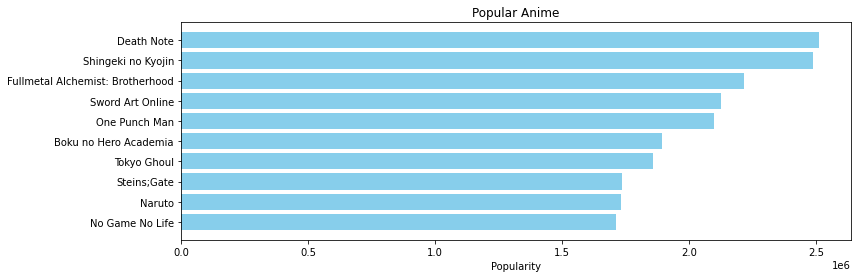

In [12]:
plt.figure(figsize=(12,4))

plt.barh(anime_popular['Name'].head(10),anime_popular['Popularity'].head(10), align='center',
        color='skyblue')
plt.gca().invert_yaxis()
plt.xlabel("Popularity")
plt.title("Popular Anime")

---
# Comparing the popularity of each studios


In [13]:
anime_top_studios = anime[['Studios','Popularity']]

In [14]:
removal = anime_top_studios['Studios'].value_counts().reset_index()
removal = removal[removal['Studios'] > 50]['index'].values
removal

filtered_studios = anime_top_studios[anime_top_studios['Studios'].isin(removal)]

[(0.0, 800000.0)]

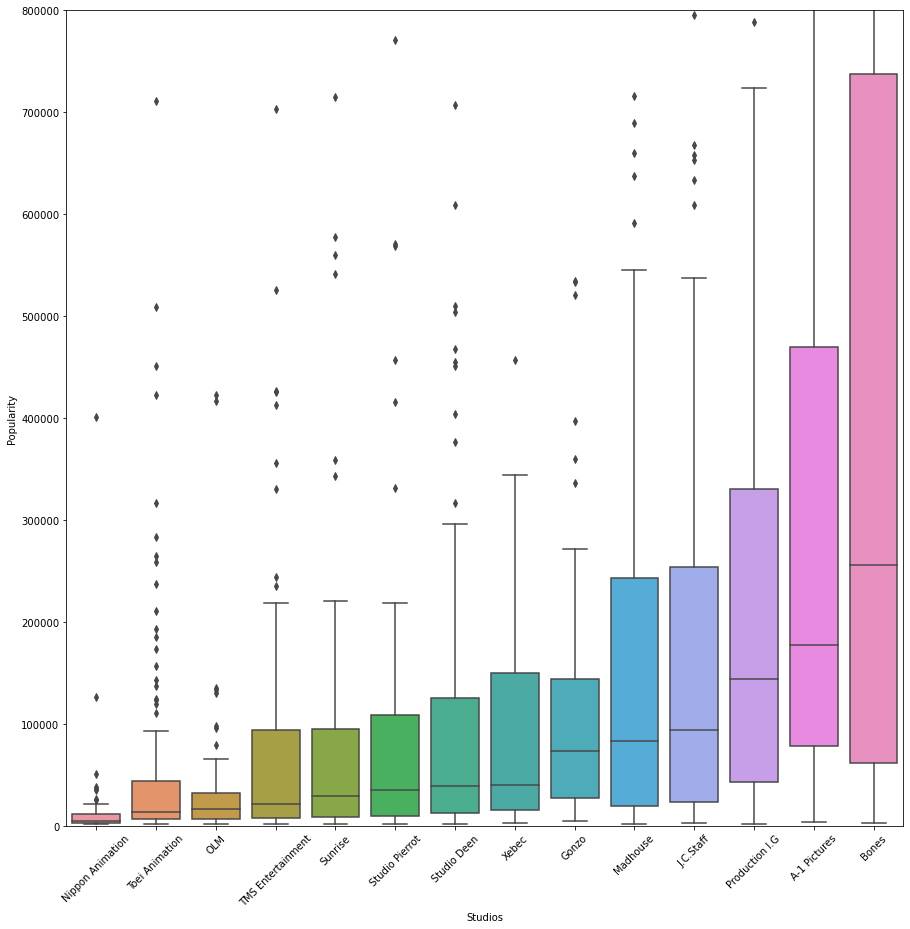

In [15]:
f = plt.figure(figsize=(15, 15))
a= sb.boxplot(x = 'Studios', y = 'Popularity', data = filtered_studios,order = filtered_studios.groupby('Studios')['Popularity'].median().sort_values().index)
plt.xticks(rotation=45);
a.set(ylim=(0,800000))

---
# Popularity of each source of anime


In [16]:
anime_source = anime[['Source','Popularity']]

[(0.0, 400000.0)]

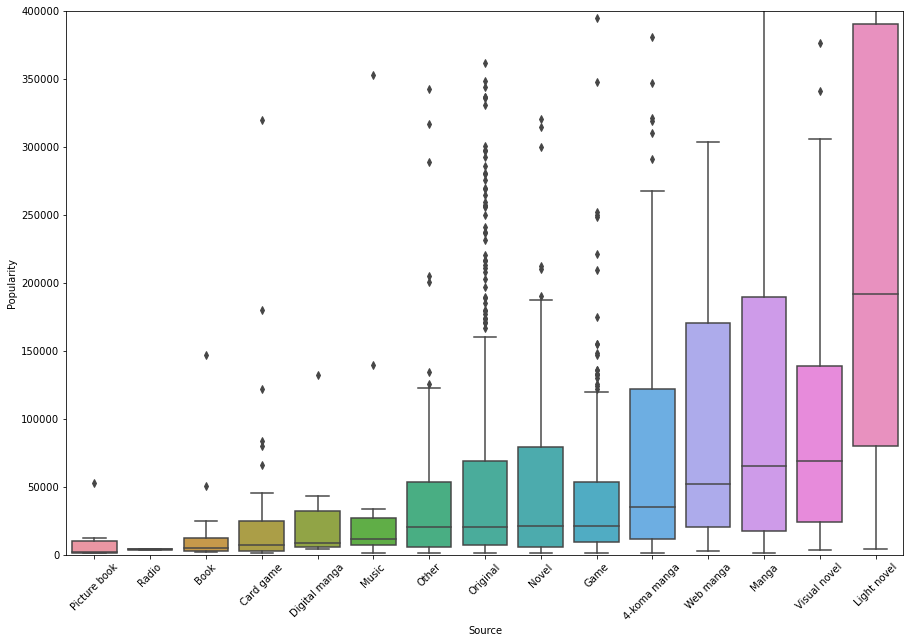

In [17]:
f = plt.figure(figsize=(15, 10))
a= sb.boxplot(x = 'Source', y = 'Popularity', data = anime_source,order = anime_source.groupby('Source')['Popularity'].median().sort_values().index)
plt.xticks(rotation=45);
a.set(ylim=(0,400000))

---
# The relationship between Source and Studios 
Some studios are better at certain sources and have higher popularity in that source of anime

In [18]:
anime_heatmap = anime[['Studios','Source','Popularity']]
anime_heatmap = anime_heatmap[anime_heatmap['Studios'].isin(removal)]

<Figure size 720x720 with 0 Axes>

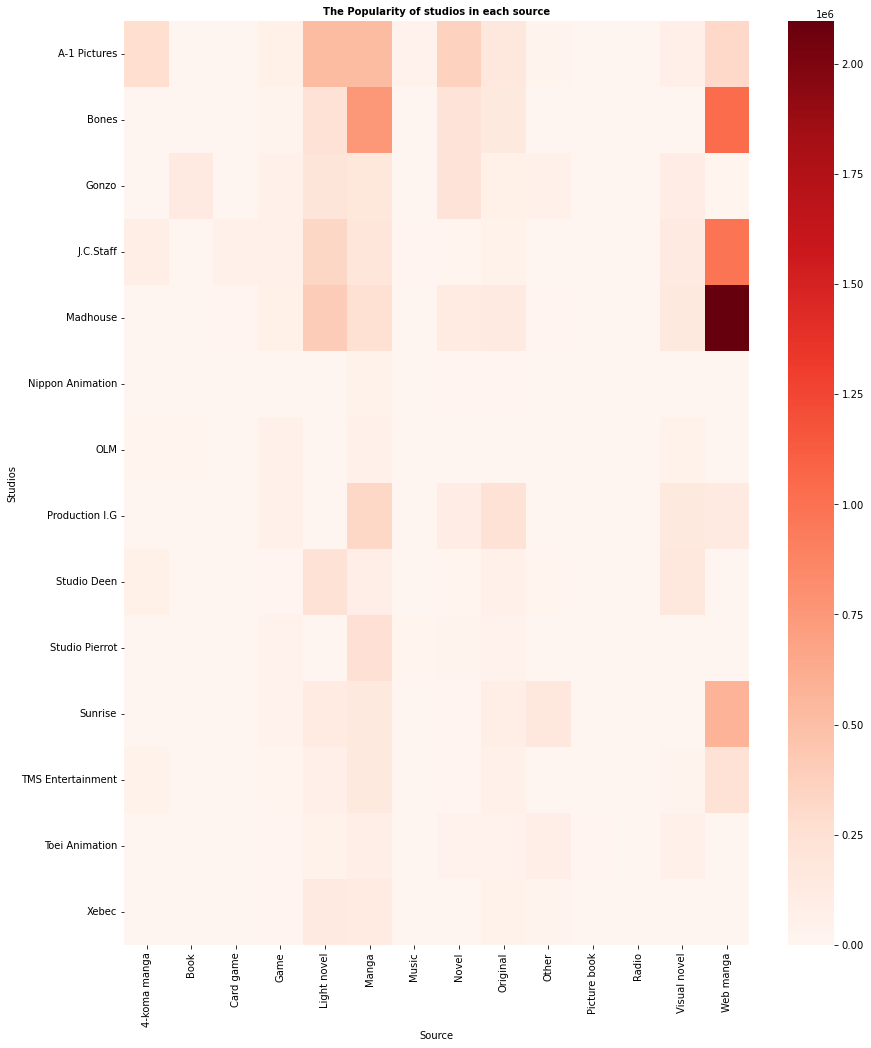

In [19]:
f = plt.figure(figsize=(10, 10))
heat = pd.pivot_table(
    anime_heatmap,
    values="Popularity",
    index=["Studios"],
    columns=["Source"],
    fill_value =0,
    margins=False,
)

f = plt.figure(figsize=(14, 17))
ax = sb.heatmap(heat, cmap="Reds")
plt.title('The Popularity of studios in each source', size=10, fontweight="bold")
plt.show()

---
# Overrated and Underrated
Overrated: Animes with high score but low popularity <br>
Underrated: Animes with high popularity but low score

In [20]:
anime_score = anime[['Name','Score']]
anime_score = anime_score.sort_values('Score', ascending=False)
anime_score.reset_index(inplace=True,drop=True)
anime_score.reset_index(inplace=True)
anime_score.rename(columns = {'index':'index_s'}, inplace = True)


anime_popularity = anime[['Name','Popularity']]
anime_popularity = anime_popularity.sort_values('Popularity', ascending=False)
anime_popularity.reset_index(inplace=True,drop=True)
anime_popularity.reset_index(inplace=True)
anime_popularity.rename(columns = {'index':'index_p'}, inplace = True)


In [21]:
anime_comp = pd.DataFrame()
anime_comp = anime_score.merge(anime_popularity[['index_p','Popularity', 'Name']], on = 'Name', how = 'left')

In [22]:
underrated = pd.DataFrame()
underrated["Underrated"] = anime_comp['index_p'] - anime_comp['index_s']
anime_underrated = pd.concat([anime_comp, underrated], axis=1, join="inner")
anime_underrated = anime_underrated[['Name','Underrated','Popularity','Score']]
anime_underrated = anime_underrated.sort_values('Underrated', ascending=False)
anime_underrated.head(10)

,Name,Underrated,Popularity,Score
134,Pui Pui Molcar,2783,3310,8.33
396,Tentai Senshi Sunred 2nd Season,2263,6642,7.90
728,Hello! Lady Lynn,2216,3055,7.57
257,Mobile Suit Gundam: The Origin - Advent of the...,2147,10840,8.09
413,Igano Kabamaru,2122,8385,7.87
310,Hanada Shounen-shi,2082,11242,8.01
652,BanG Dream! Garupa☆Pico: Oomori,2065,5612,7.63
649,Trapp Ikka Monogatari,2056,5763,7.63
705,Konnichiwa Anne: Before Green Gables,2054,5137,7.59
802,Perrine Monogatari,2047,3947,7.52


In [23]:
overrated = pd.DataFrame()
overrated["Overrated"] = anime_comp['index_s']- anime_comp['index_p']
anime_overrated = pd.concat([anime_comp, overrated], axis=1, join="inner")
anime_overrated = anime_overrated[['Name','Overrated','Popularity','Score']]
anime_overrated = anime_overrated.sort_values('Overrated', ascending=False)
anime_overrated.head(10)


,Name,Overrated,Popularity,Score
2973,School Days,2765,498446,5.68
2930,Boruto: Naruto Next Generations,2649,416055,5.81
3068,Diabolik Lovers,2528,224406,5.30
2644,Tokyo Ghoul:re 2nd Season,2394,446952,6.33
2697,"Yosuga no Sora: In Solitude, Where We Are Leas...",2351,340982,6.26
2718,Isekai wa Smartphone to Tomo ni.,2350,322466,6.24
3048,Isekai Cheat Magician,2334,165264,5.38
3090,Ousama Game The Animation,2331,150411,5.00
3041,Big Order (TV),2308,157337,5.40
3014,Mayoiga,2306,166871,5.53


---
# Relationship between premiered and popularity
Popularity of an anime will be affected by the season of anime's premiere

In [24]:
anime_premiered = pd.DataFrame()
anime_premiered = anime[['Name','Premiered','Popularity']]
anime_premiered[['Season','Year']] = anime_premiered["Premiered"].str.split(" ", 1, expand=True)
anime_premiered = anime_premiered[['Name','Season','Popularity']]
anime_premiered.head()

/Users/yeeksheng/opt/anaconda3/lib/python3.9/site-packages/pandas/core/frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


,Name,Season,Popularity
0,Cowboy Bebop,Spring,1225282
1,Trigun,Spring,544988
2,Witch Hunter Robin,Summer,89305
3,Bouken Ou Beet,Fall,12116
4,Eyeshield 21,Spring,136686


[(0.0, 200000.0)]

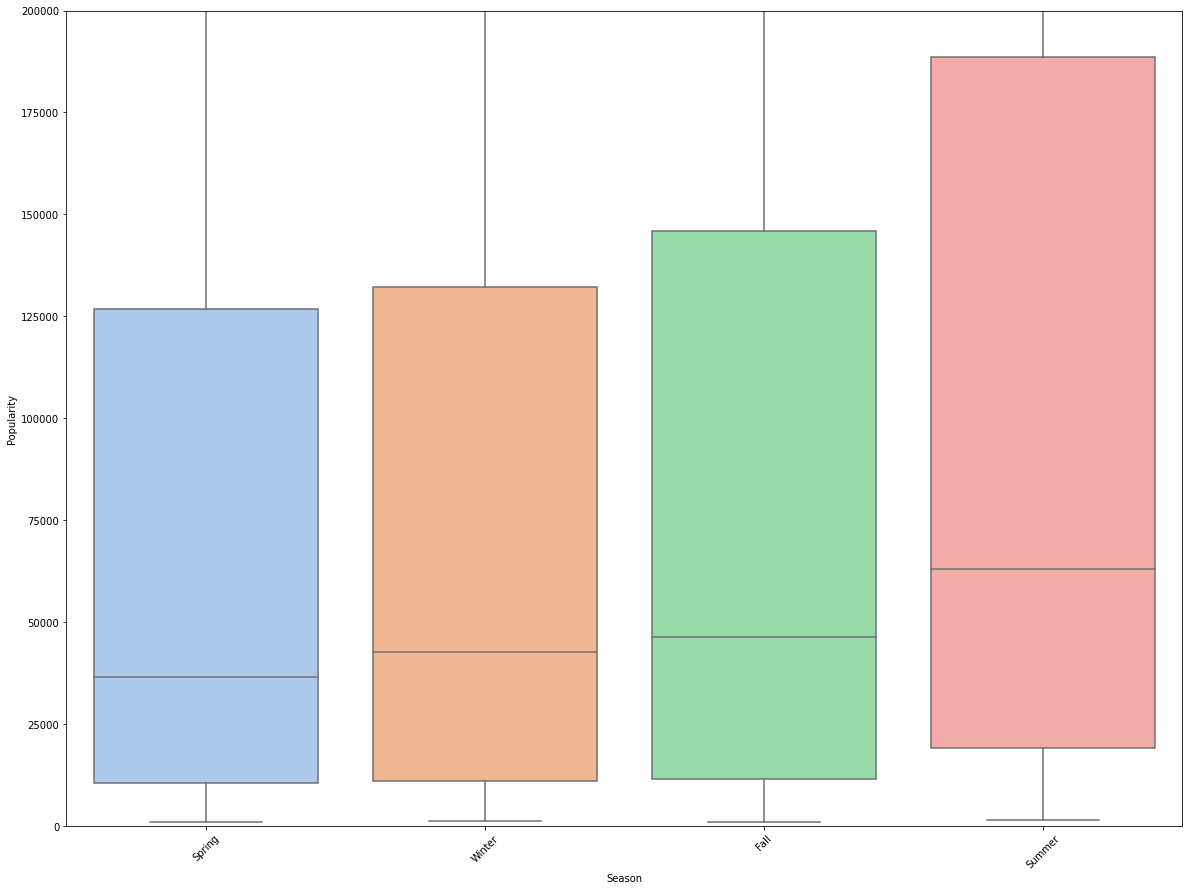

In [25]:
f = plt.figure(figsize=(20, 15))
a = sb.boxplot(x = 'Season', palette = "pastel",y = 'Popularity',data = anime_premiered,order = anime_premiered.groupby('Season')['Popularity'].median().sort_values().index)
plt.xticks(rotation=45);
a.set(ylim=(0,200000))